In [2]:
#####################--------AKHIL MITTAL ------1219691005-------ASSIGNMENT-4-------####################################
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
db_filename="/Users/akhilmittal/Documents/Spring 2021/CSE 578 DV/Assignments/ass2/dinofunworld-1.db"
conn=sqlite3.connect(db_filename)
c=conn.cursor()

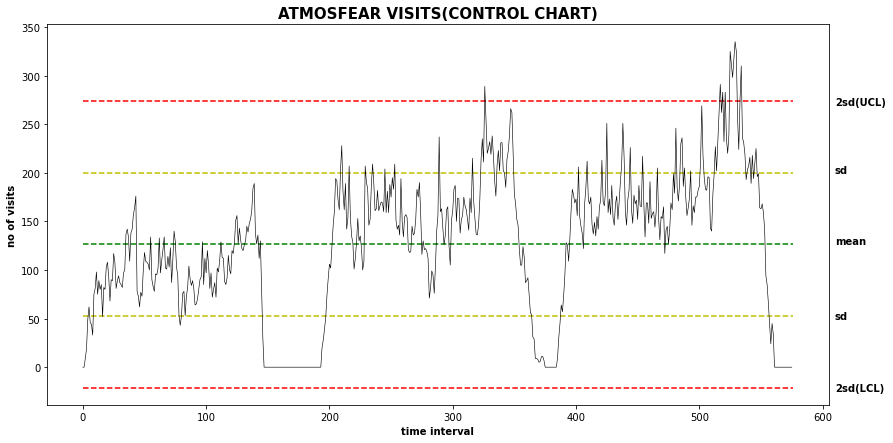

In [12]:
##QUESTION 1####
c.execute("SELECT sequence FROM sequences")
sequences = c.fetchall()
atmosfear=[0]*576;

for row in sequences:
    sequence = [int(i) for i in row[0].split('-')]
    for index in range(len(sequence)):
        if (sequence[index] == 8):
            atmosfear[index]+=1;

mean=np.nanmean(atmosfear)
sd=np.nanstd(atmosfear)
    
    
plt.figure(figsize=(14, 7))
plt.annotate('2sd(LCL)', xy=(1,70), xytext=(610,-25),fontweight='bold')
plt.annotate('sd', xy=(1, 70), xytext=(610,50),fontweight='bold')
plt.annotate('mean', xy=(1, 70), xytext=(610,126.36),fontweight='bold')
plt.annotate('sd', xy=(1, 70), xytext=(610, 200),fontweight='bold')
plt.annotate('2sd(UCL)', xy=(1, 70), xytext=(610, 270),fontweight='bold')
plt.plot([0,len(atmosfear)],[mean,mean],'g--')
plt.plot([0, len(atmosfear)], [mean+sd, mean+sd],'y--')
plt.plot([0, len(atmosfear)], [mean-sd, mean-sd], 'y--')
plt.plot([0, len(atmosfear)], [mean+2*sd, mean+2*sd], 'r--')
plt.plot([0, len(atmosfear)], [mean-2*sd, mean-2*sd], 'r--')
plt.plot(range(len(atmosfear)),atmosfear,linestyle='-', color='black',linewidth=0.6)
plt.title('ATMOSFEAR VISITS(CONTROL CHART)', fontweight='bold', fontsize=15)
plt.xlabel('time interval', fontweight='bold', fontsize=10)
plt.ylabel('no of visits', fontweight='bold', fontsize=10)
plt.savefig("control_chart.png",bbox_inches='tight',dpi=100)
plt.show()

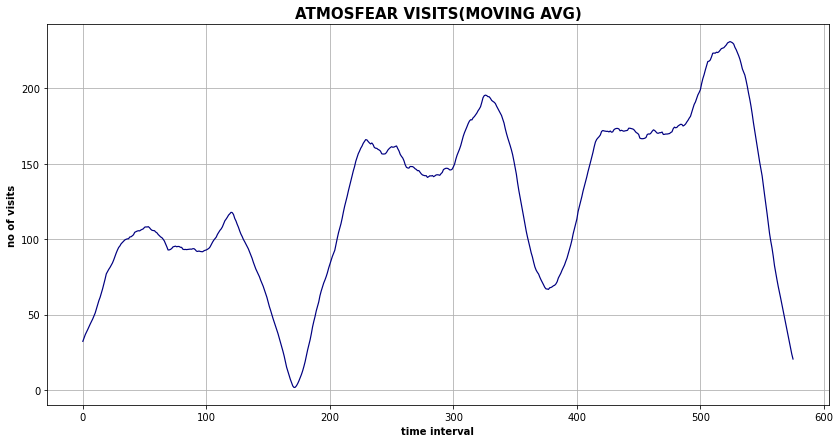

In [13]:
###     QUESTION 2 ##########

window_size=50
plt.figure(figsize=(14, 7))
plt.plot(np.convolve(atmosfear,np.ones(window_size)/window_size,'same'),linestyle='-', color='navy',linewidth=1.2)
plt.title('ATMOSFEAR VISITS(MOVING AVG)', fontweight='bold', fontsize=15)
plt.xlabel('time interval', fontweight='bold', fontsize=10)
plt.ylabel('no of visits', fontweight='bold', fontsize=10)
plt.grid()
plt.savefig("moving_avg.png",bbox_inches='tight',dpi=100)
plt.show()

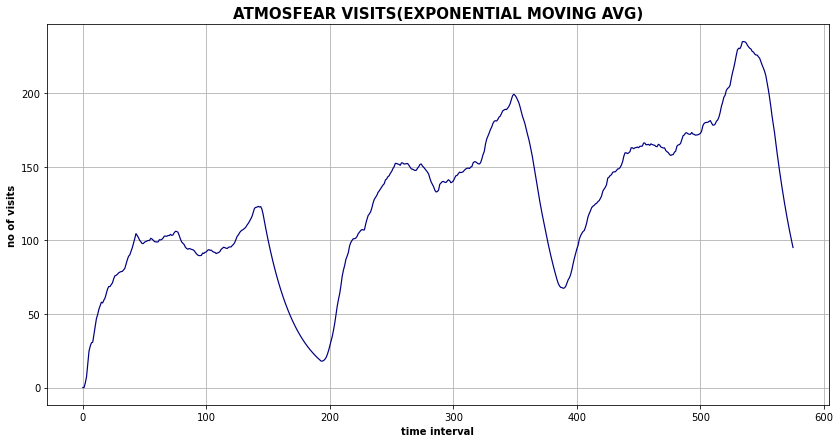

In [14]:
###   QUESTION 3 ##########

span=50
df=pd.DataFrame({'atmosfear':atmosfear})
df_exp=df.ewm(span=50).mean()
plt.figure(figsize=(14, 7))
plt.plot(df_exp,linestyle='-', color='navy',linewidth=1.2)
plt.title('ATMOSFEAR VISITS(EXPONENTIAL MOVING AVG)', fontweight='bold', fontsize=15)
plt.xlabel('time interval', fontweight='bold', fontsize=10)
plt.ylabel('no of visits', fontweight='bold', fontsize=10)
plt.grid()
plt.savefig("exponential_moving_avg.png",bbox_inches='tight',dpi=100)
plt.show()